## Principal Component Analysis


### Usando PCA para compresión de imágenes
Una imagen puede ser tratada como una matriz, con los valores de cada celda siendo la intensidad de cada pixel
Los pasos básicos que seguiremos son:
- Aplicar PCA a la matriz de la imagen para reducir la dimensionalidad a un pequeño número de componentes principales
- Para anlizar cuanta información visual conserva, vamos a reconstruir la imagen desde el número de componentes seleccionado
- Analizaremos que tan buenas resultan las reconstrucciones para distintos números de componentes principales


Comenzamos imoprtando las librerías necesarias, la matriz de la imagen y finalmente la visualizamos

(720, 1280, 3)


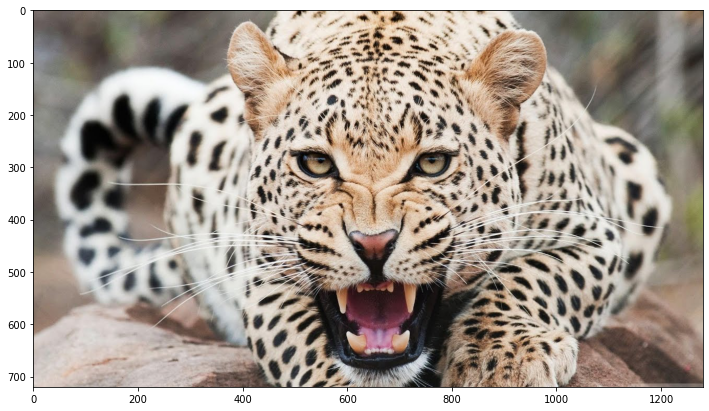

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("wild.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)


**Sobre la imagen - **  
La imagen es a color y posee 3 canales: rojo, verde y azul.
Su dimensionalidad es de 720x1280x3, osea 3 matrices de 720 x 1280, una para cada color.

Aunque podríamos trabajar con los 3 colores, para el propósito de este ejercicio no basta con uno, por lo que convertiremos la imagen a escala de grises.

**Convirtiendo a escala de grises** - 
1. Para cada pixel sumamos los valores de los 3 colores (RGB).
2. Normalizamos los valores dividiendo por el valor máximo de toda la imagen, obteniendo todos valores entre 0 y 1

Dibujamos la matriz en escala de grises

(720, 1280)
1.0


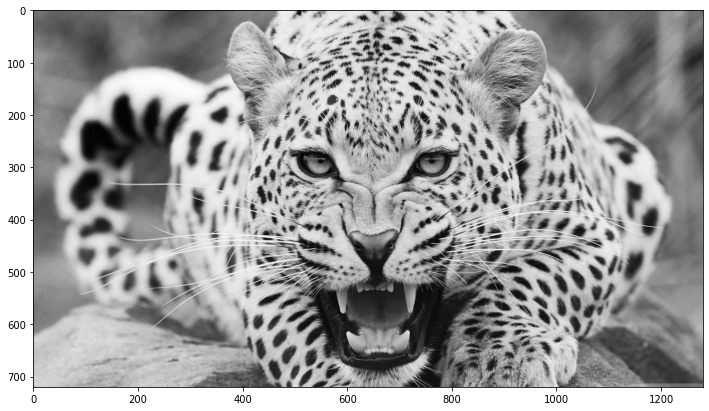

In [2]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

### Aplicando PCA a la imagen

- Calculamos todos los componentes principales de la imagen
- Graficos la varianza explicada en función de la cantidad de componentes
- Comenzamos seleccionando el número mínimo de componentes necesarios para explicar el 95% de la varianza

El numero minimo de componentes para explicar el 95% de la varianza es: 72


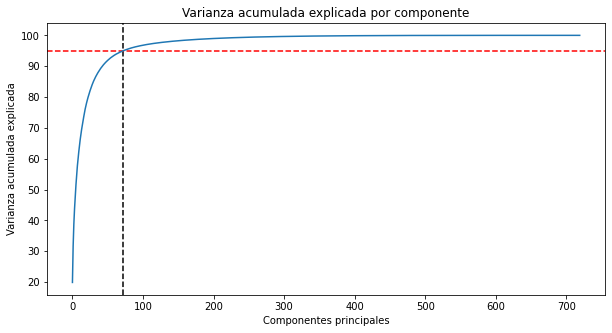

In [3]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(image_bw.T)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("El numero minimo de componentes para explicar el 95% de la varianza es: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

**La cantidad necesaria es 74 componentes, en vez de 720, pueden explicar el 95% de la varianza de la imagen!**  
74 en vez de 720!    

Procedamos ahora a construir la imagen utilizando sólo las 74 componentes y veamos si la reconstrucción de la imagen es visualmente distinta a la original.

### Reconstruyendo la imagen en b&n con 74 componentes

1. Primero, utilizamos al función `fit_transform` de la libreria PCA para identificar las 74 componentes y representar la matriz en esas 74 dimensiones
2. Luego, reconstruiremos la matriz original utilizando sólo esas 74 dimensiones mediante la función `inverse_transform`

Finalmente dibujamos la imagen para estimar la calidad de la misma

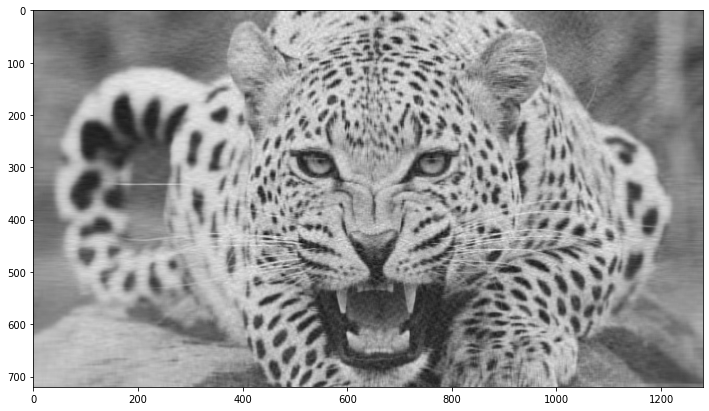

In [4]:
ipca = PCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

Bueno, para un 95% de la imagen esperábamos una buena calidad, no? notemos que la definición sigue siendo bastante buena.

Lo que se pierde es un poco de claridad, puede observarse como un efecto de blur en algunas partes de la foto.


#### Probemos usar un mayor número de componentes, 150

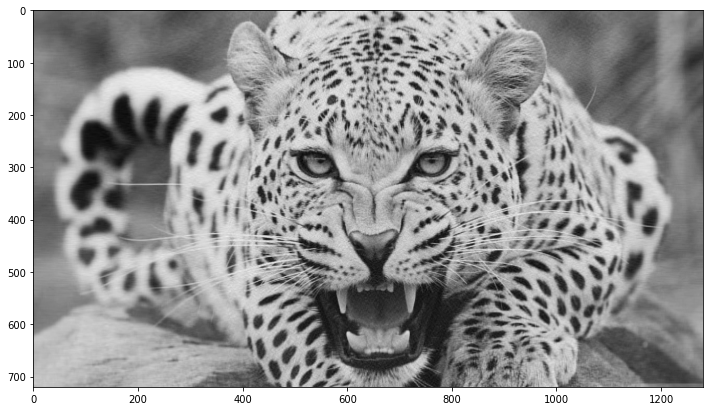

In [5]:
# Function to reconstruct and plot image for a given number of components

def plot_at_k(k):
    ipca = PCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 150
plt.figure(figsize=[12,8])
plot_at_k(k)

Mucho mejor, sigue teniendo algunas imperfecciones, pero la mayoría de los detalles pueden apreciarse.

### Reconstruyendo desde distintos números de componentes principales
- Probaremos distintos números de componentes, comenzando por 10 hasta 550
- Para cada uno de ellos reconstruiremos la imagen para analizar como se aprecia visualmente

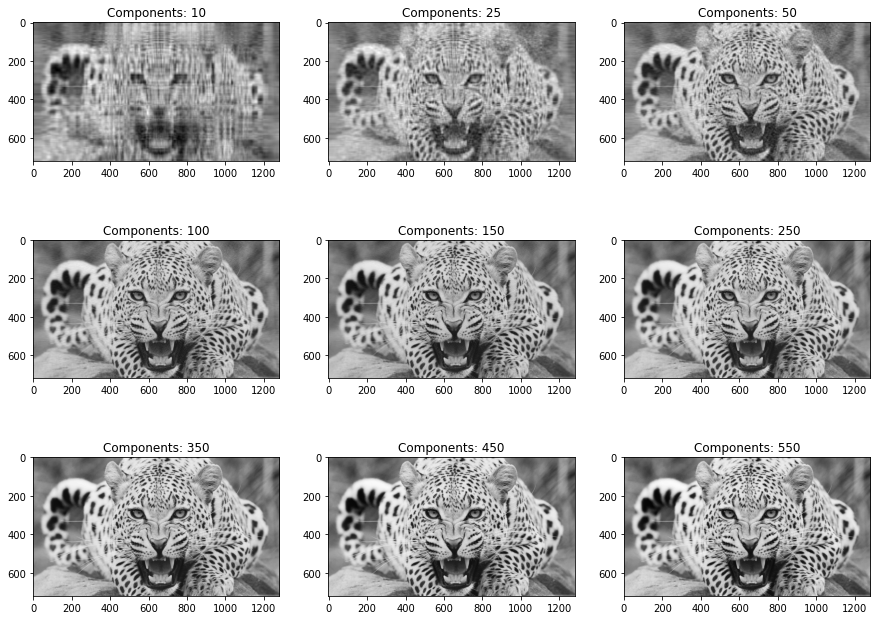

In [6]:
ks = [10, 25, 50, 100, 150, 250, 350, 450,550]

plt.figure(figsize=[15,12])

for i in range(9):
    plt.subplot(3,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

Podemos ver que a partir de 100, las reconstrucciones parecen indistinguibles de la original.

